In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
cd

C:\Users\Anne


In [4]:
cd Downloads

C:\Users\Anne\Downloads


In [6]:
data=pd.read_csv('Fraud.csv')

In [7]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data Analysis

In [8]:
data.size

69988820

In [9]:
data.shape

(6362620, 11)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [12]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [13]:
d1=data.select_dtypes(exclude=['object'])

In [14]:
d1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [15]:
d1.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


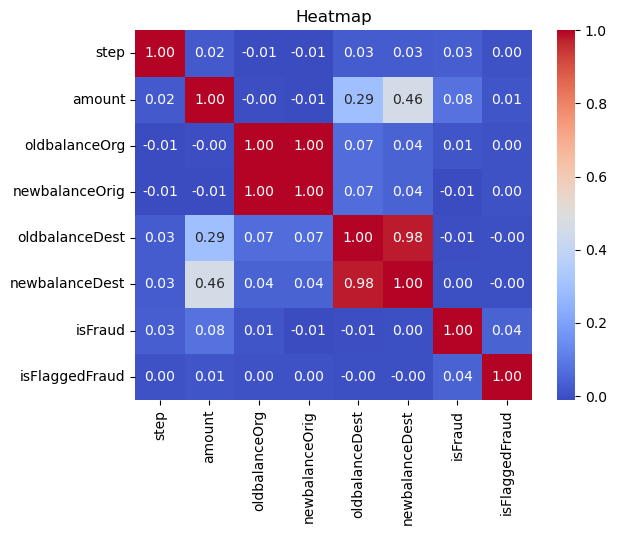

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(d1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap')
plt.show()

In [17]:
#There is multicolinearity seen
#between oldbalanceOrg and newbalanceOrig
#between oldbalancDest and newbalanceDest
#one of these should be removed

In [18]:
data.duplicated().sum()

0

In [19]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [20]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [21]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [22]:
fraud=data[data['isFraud'] == 1]

In [23]:
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [24]:
fraud['type'].unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [25]:
data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [26]:
data[data['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [27]:
data[(data['isFraud'] == 1) & (data['isFlaggedFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [28]:
notfraud=data[data['isFraud'] == 0]

In [29]:
notfraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0


In [30]:
notfraud['type'].unique()

array(['PAYMENT', 'DEBIT', 'CASH_OUT', 'TRANSFER', 'CASH_IN'],
      dtype=object)

In [31]:
maximum_amt = fraud['amount'].max()
minimum_amt = fraud['amount'].min()
print(f"Maximum Amount: {maximum_amt}")
print(f"Minimum Amount: {minimum_amt}")

Maximum Amount: 10000000.0
Minimum Amount: 0.0


In [32]:
maximum_amt_row = data.loc[fraud['amount'].idxmax()]
minimum_amt_row = data.loc[fraud['amount'].idxmin()]

print("Row with Maximum Amount:")
print(maximum_amt_row)

print("\nRow with Minimum Amount:")
print(minimum_amt_row)

Row with Maximum Amount:
step                        4
type                 TRANSFER
amount             10000000.0
nameOrig             C7162498
oldbalanceOrg     12930418.44
newbalanceOrig     2930418.44
nameDest           C945327594
oldbalanceDest            0.0
newbalanceDest            0.0
isFraud                     1
isFlaggedFraud              0
Name: 4440, dtype: object

Row with Minimum Amount:
step                      212
type                 CASH_OUT
amount                    0.0
nameOrig          C1510987794
oldbalanceOrg             0.0
newbalanceOrig            0.0
nameDest          C1696624817
oldbalanceDest            0.0
newbalanceDest            0.0
isFraud                     1
isFlaggedFraud              0
Name: 2736447, dtype: object


In [33]:
fraud[fraud['newbalanceDest'] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


In [34]:
fraud[fraud['oldbalanceDest'] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.0,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.00,1,0


In [35]:
fraud[fraud['amount'] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


In [36]:
d2=fraud.select_dtypes(exclude=['object'])

In [37]:
cor=d2.drop(columns=['isFraud']).corr()

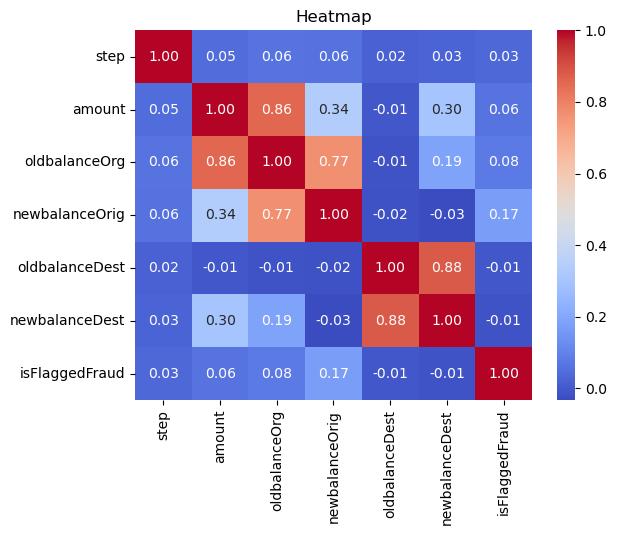

In [38]:
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap')
plt.show()

In [39]:
#Based on the above analysis, we can observe that amount, oldbalanceOrg and oldbalanceDest have high importance
#all fraud transactions are targeted towards Transfer and Cashout
#most of the oldbalanceDest in fraud transactions are zero

In [40]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [41]:
#We observe that data is highly imbalanced

In [87]:
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data['amount'] < Q1 - 1.5 * IQR) | (data['amount'] > Q3 + 1.5 * IQR))

In [88]:
outliers.describe()

count     6362620
unique          2
top         False
freq      6024542
Name: amount, dtype: object

<Axes: >

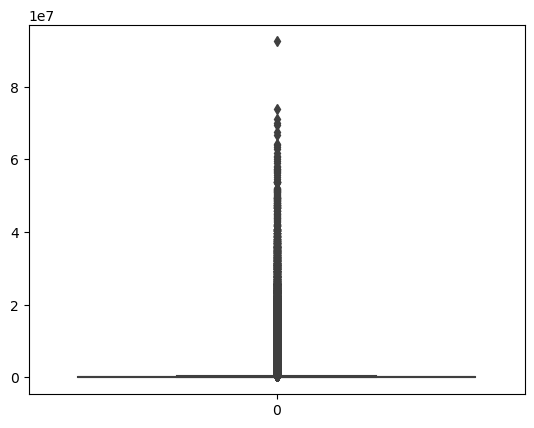

In [89]:
sns.boxplot(data['amount'])

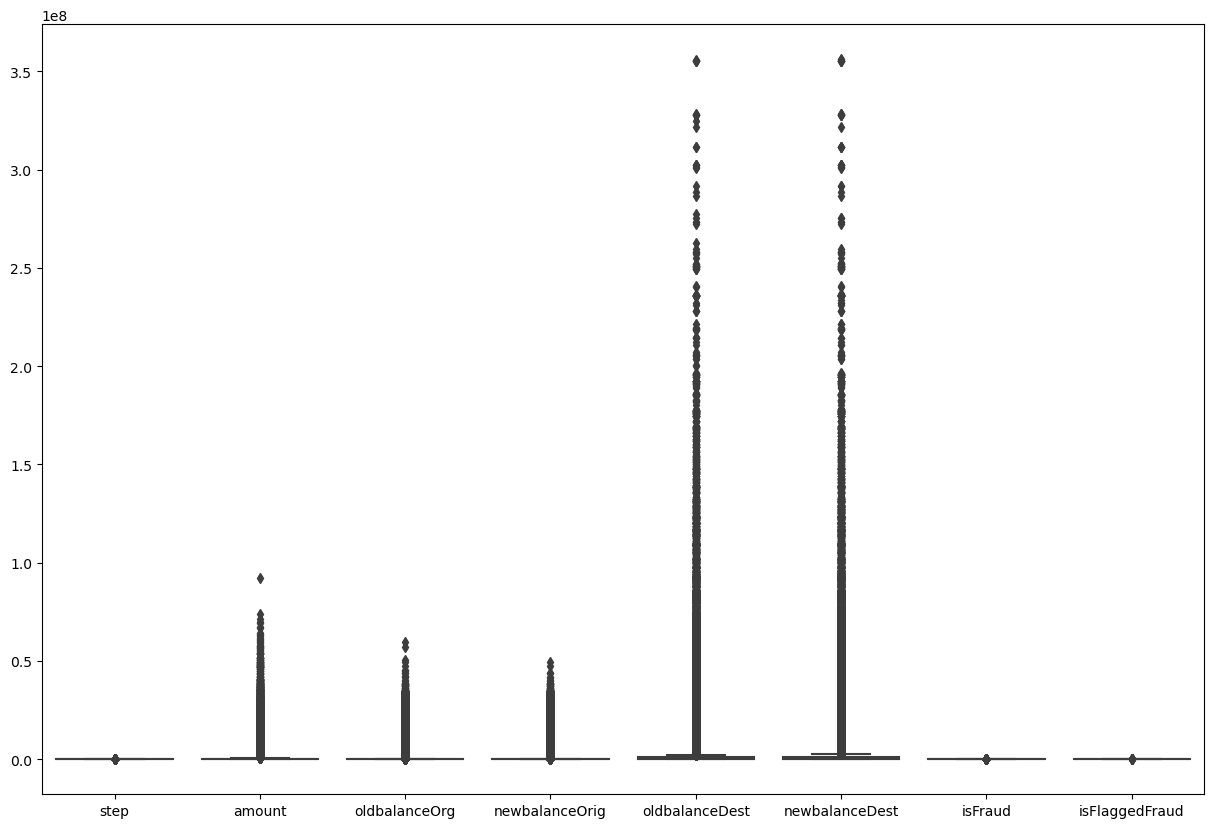

In [93]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(data)
plt.show()

# Data preprocessing

In [42]:
newnotfraud=notfraud.sample(n=8213)

In [43]:
newnotfraud.shape

(8213, 11)

In [44]:
fraud.shape

(8213, 11)

In [45]:
newnotfraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2187665,185,PAYMENT,6925.49,C942601422,0.0,0.00,M1026690518,0.00,0.00,0,0
3243136,250,CASH_OUT,46179.12,C724066468,51290.0,5110.88,C967053521,0.00,46179.12,0,0
858611,41,CASH_OUT,216974.04,C1037847483,0.0,0.00,C1042096351,273164.28,490138.32,0,0
2998428,232,CASH_OUT,62195.71,C181834549,0.0,0.00,C1763920147,3360332.72,3422528.43,0,0
2537289,205,PAYMENT,7814.41,C1952352353,49602.0,41787.59,M890766151,0.00,0.00,0,0


In [46]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [47]:
new_df=pd.concat([newnotfraud,fraud], axis=0)

In [48]:
new_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2187665,185,PAYMENT,6925.49,C942601422,0.00,0.00,M1026690518,0.00,0.00,0,0
3243136,250,CASH_OUT,46179.12,C724066468,51290.00,5110.88,C967053521,0.00,46179.12,0,0
858611,41,CASH_OUT,216974.04,C1037847483,0.00,0.00,C1042096351,273164.28,490138.32,0,0
2998428,232,CASH_OUT,62195.71,C181834549,0.00,0.00,C1763920147,3360332.72,3422528.43,0,0
2537289,205,PAYMENT,7814.41,C1952352353,49602.00,41787.59,M890766151,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [49]:
print(new_df['type'].unique())

['PAYMENT' 'CASH_OUT' 'TRANSFER' 'CASH_IN' 'DEBIT']


In [50]:
def converter(value):
    if value == 'PAYMENT':
        return 0
    if value == 'TRANSFER':
        return 1
    if value == 'CASH_OUT':
        return 2
    if value == 'DEBIT':
        return 3
    else:
        return 4

In [51]:
new_df['type'] = data['type'].apply(converter)

In [52]:
new_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2187665,185,0,6925.49,C942601422,0.00,0.00,M1026690518,0.00,0.00,0,0
3243136,250,2,46179.12,C724066468,51290.00,5110.88,C967053521,0.00,46179.12,0,0
858611,41,2,216974.04,C1037847483,0.00,0.00,C1042096351,273164.28,490138.32,0,0
2998428,232,2,62195.71,C181834549,0.00,0.00,C1763920147,3360332.72,3422528.43,0,0
2537289,205,0,7814.41,C1952352353,49602.00,41787.59,M890766151,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,1,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,2,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,1,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [98]:
data2=new_df.drop(columns=['nameOrig','nameDest','newbalanceOrig','newbalanceDest'])

In [99]:
data2

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
2187665,185,0,6925.49,0.00,0.00,0,0
3243136,250,2,46179.12,51290.00,0.00,0,0
858611,41,2,216974.04,0.00,273164.28,0,0
2998428,232,2,62195.71,0.00,3360332.72,0,0
2537289,205,0,7814.41,49602.00,0.00,0,0
...,...,...,...,...,...,...,...
6362615,743,2,339682.13,339682.13,0.00,1,0
6362616,743,1,6311409.28,6311409.28,0.00,1,0
6362617,743,2,6311409.28,6311409.28,68488.84,1,0
6362618,743,1,850002.52,850002.52,0.00,1,0


In [103]:
data2.corr()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.017174,0.149134,0.080656,-0.005439,0.326155,0.037537
type,-0.017174,1.000000,-0.014314,0.224058,0.161724,-0.070058,-0.016334
amount,0.149134,-0.014314,1.000000,0.642575,0.011089,0.345061,0.067483
oldbalanceOrg,0.080656,0.224058,0.642575,1.000000,0.008418,0.127321,0.062904
oldbalanceDest,-0.005439,0.161724,0.011089,0.008418,1.000000,-0.083866,-0.007881
isFraud,0.326155,-0.070058,0.345061,0.127321,-0.083866,1.000000,0.031225
isFlaggedFraud,0.037537,-0.016334,0.067483,0.062904,-0.007881,0.031225,1.000000


In [100]:
#removing 'newbalanceOrig' and 'newbalanceDest' to reduce multicolinearity
#removing 'nameOrig' and 'nameDest' because of very low importance to the data

# Building the model

In [101]:
X = data2.drop(columns=['isFraud'])
y = data2['isFraud']

In [102]:
X.shape

(16426, 6)

In [57]:
y.shape

(16426,)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [60]:
model.fit(X_train,Y_train)

LogisticRegression()

In [61]:
prediction=model.predict(X_test)

In [62]:
prediction

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification Report")
print(classification_report(Y_test,prediction))
print("Confusion Matrix")
print(confusion_matrix(Y_test,prediction))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.39      0.52      1675
           1       0.58      0.90      0.71      1611

    accuracy                           0.64      3286
   macro avg       0.69      0.64      0.61      3286
weighted avg       0.69      0.64      0.61      3286

Confusion Matrix
[[ 647 1028]
 [ 167 1444]]


# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()

In [65]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [66]:
prediction2=model2.predict(X_test)

In [67]:
print("Classification Report")
print(classification_report(Y_test,prediction2))
print("Confusion Matrix")
print(confusion_matrix(Y_test,prediction2))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1675
           1       0.97      0.98      0.98      1611

    accuracy                           0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286

Confusion Matrix
[[1629   46]
 [  30 1581]]


# SVM

In [68]:
from sklearn.svm import SVC
model3 = SVC()

In [69]:
model3.fit(X_train,Y_train)

SVC()

In [70]:
prediction3=model3.predict(X_test)

In [71]:
print("Classification Report")
print(classification_report(Y_test,prediction3))
print("Confusion Matrix")
print(confusion_matrix(Y_test,prediction3))

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.95      0.82      1675
           1       0.93      0.60      0.73      1611

    accuracy                           0.78      3286
   macro avg       0.82      0.78      0.77      3286
weighted avg       0.82      0.78      0.78      3286

Confusion Matrix
[[1598   77]
 [ 637  974]]


# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()

In [73]:
model4.fit(X_train,Y_train)

RandomForestClassifier()

In [74]:
prediction4=model4.predict(X_test)

In [75]:
print("Classification Report")
print(classification_report(Y_test,prediction4))
print("Confusion Matrix")
print(confusion_matrix(Y_test,prediction4))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1675
           1       0.97      0.99      0.98      1611

    accuracy                           0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286

Confusion Matrix
[[1628   47]
 [  10 1601]]


4. Demonstrate the performance of the model by using best set of tools.

In [94]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model4, X, y, cv=5) 

In [95]:
cross_val_scores

array([0.52738892, 0.88462709, 0.83805175, 0.98569254, 0.90837139])

1. Data cleaning including missing values, outliers and multi-collinearity.

There were no missing values or duplicated values, outliers were not removed because of the data size and relevancy, multi-collinearity was rectified by removing less relevant features.

2. Describe your fraud detection model in elaboration.

A Random Forest is an ensemble learning model that combines multiple decision trees, each trained on a different subset of data, using techniques such as bootstrap sampling and feature randomness, resulting in a robust and accurate prediction method for classification or regression tasks.

3. How did you select variables to be included in the model?

I selected my variables based on correlation and relevance to the dataset. And how the data is distributed.

4. Demonstrate the performance of the model by using best set of tools.

5. What are the key factors that predict fraudulent customer?

The key factors that predict fraudulent customer are amount and type.

6. Do these factors make sense? If yes, How? If not, How not?

Yes. Because the variation in the money transactions and balance clearly reflects if it is fraud or not. The type of transactions makes it easier to make fraud transactions.

7. What kind of prevention should be adopted while company update its infrastructure?

To look out for the type of transaction and to look out for oldbalanceorig and oldbalancedest, ie. the initial amount and the final amount after transaction and the newbalanceDest.

8. Assuming these actions have been implemented, how would you determine if they work?

Some methods:

Assess cross-validation scores for improved consistency and robustness across different subsets of the data.

Collaborate with stakeholders to understand the impact of model changes on business goals and fraud prevention efforts.

Perform time series analysis to observe trends in fraud detection over time and identify sustained improvements.

Consider A/B testing in a production environment to compare the performance of the updated model against the previous version.

Seek external evaluations or audits for an independent assessment of the fraud detection system's effectiveness.

Implement continuous monitoring to track the model's performance over time and make adjustments based on emerging patterns.
